## test_optics

In [5]:
"""
test_optics.py connected to test_optics.ipynb 
via "jupytext" light pairing.

omec.__init__()
omec.verbose = True
commands = ["solve", "NewtonsLaw2", a]
print(omec.process(commands))

References:
===========    
Abedin, Islam, Haider, 2007, Computer simulation of Fresnel diffraction from rectangular apertures and obstacles using the Fresnel integral

"""
import copy
import sys
import os
lstPaths = ["../src"]
for ipath in lstPaths:
    if ipath not in sys.path:
        sys.path.append(ipath)
from libsympy import *
from optics import *
# Execute jupyter-notebook related commands.
#exec(open('libnotebook.py').read())
print(sys.version); print(sys.path)

3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
['/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/yubuntu/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.8/dist-packages', '../src', '../../libpython/src']


### Settings

In [8]:
#### Settings
class sets:
    """
    Setttings class.
        
    Instead of settings class, settings nametuble might be used.
    Settings = namedtuple("Settings", "type dropinf delta")
    sets = Settings(type="symbolic", dropinf=True, delta=0.1)
    """
    global dictflow, test_all
    
    def __init__(self):
        pass
    
    input_dir  = "input/optics"
    output_dir = "output/optics"
    
    # Plotting settings
    plot_time_scale = {1:"xy", 2:"xz", 3:"yz"}[3]
    
    # Execution settings.
    test_all = {0:False, 1:True}[1]
    dictflow = dict(
        ch1 = {100:"get_formulary", 150:"get_subformulary",
                200:"", 300:"diffraction_rectangular", 400:"Fraunhofer_Diff_Int"})
    flow = [dictflow["ch1"][i] for i in [100]]
    if test_all: flow = flatten([list(dictflow[i].values()) for i in dictflow.keys()])

In [9]:
print("Test of the {0}.".format(sets.flow))

Test of the ['get_formulary', 'get_subformulary', '', 'diffraction_rectangular', 'Fraunhofer_Diff_Int'].


### get_formulary

In [ ]:
#### get_formulary
if "get_formulary" in sets.flow:
    oopti.__init__()
    oopti.get_formulary()

### get_subformulary

In [ ]:
#### get_subformulary
if "get_subformulary" in sets.flow:
    oopti.__init__()
    oopti.get_subformulary() 

### diffration_rectangular

Diffraction from a Rectangular Aperture
Abedin2005Fig6a   Fraunhofer


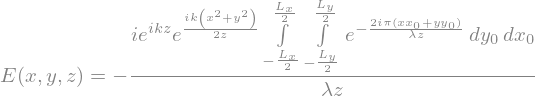

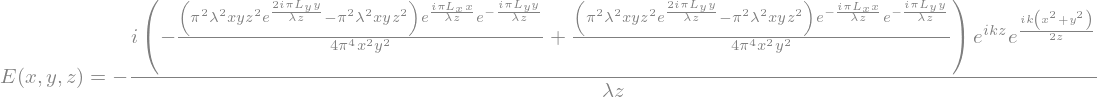

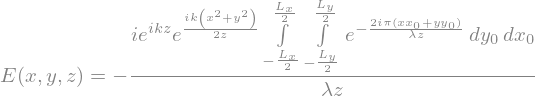

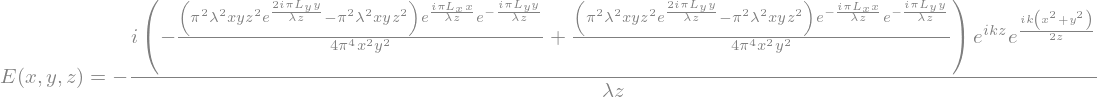

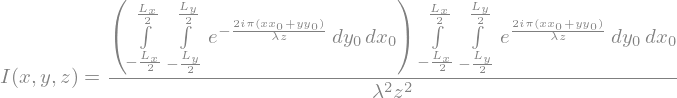

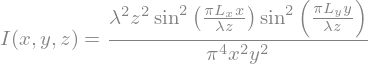

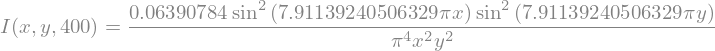

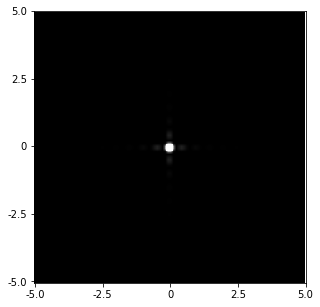

In [11]:
#### diffraction_rectangular
if "diffraction_rectangular" in sets.flow:
    """
    from scipy.integrate import quad
    from scipy.special import jn
    integrand = lambda x, r: np.exp(-x** 2 ) * np.exp(np.pi* 1j *(-x)) * jn( 0 , r*x) * x
    intensity = lambda r: np.sqrt(quad( lambda x: np.real(integrand(x, r)),0,5 )[0]** 2 + quad(lambda x: np.imag(integrand(x, r)), 0 , 5)[0]**2)
    
    import matplotlib.pyplot as plt
    t = np.linspace(0, 3)
    plt.plot(t, np.vectorize(intensity)(t))
    """
    
    print("Diffraction from a Rectangular Aperture")
    class_type = {1:"Rayleigh_Sommerfeld", 2:"Fraunhofer", 3:"Fresnel"}[2]
    oopti.__init__(class_type)
    oopti.verbose = False
    
    [Lx,Ly] = symbols('L_x L_y', real=True, positive=True)
    rectX = oopti.subformulary.rect(x0/Lx)
    rectY = oopti.subformulary.rect(y0/Ly)
    xreplaces = {Uapr:1, Eli:1, 
                 x0min:-S(1)/2*Lx, x0max:S(1)/2*Lx,
                 y0min:-S(1)/2*Ly, y0max:S(1)/2*Ly}
#    xreplaces = {Uapr:1, Eli:1, 
#                 x0min:-Lx, x0max:Lx,
#                 y0min:-Ly, y0max:Ly}
    
    # Numerical Calculations
    # config in mm.
    n = 100
    screen_factor = 2.5;
    config = {0:0, 1:"LakshminarayananFig11_3",
              61:"Abedin2005Fig6a", 62:"Abedin2005Fig6b",
              63:"Abedin2005Fig6c", 64:"Abedin2005Fig6d", 
              72:"Abedin2005Fig7b"}[61]
    [nLx, nLy] = {0:[1, 1],
                "LakshminarayananFig11_3":[0.11, 0.11],
                "Abedin2005Fig6a":[2,2], "Abedin2005Fig6b":[2,2],
                "Abedin2005Fig6c":[2,2], "Abedin2005Fig6d":[2,2], 
                "Abedin2005Fig7b":[2,2]}[config]
    # Wavelength (mm).
    nl = {0:1, 
          "LakshminarayananFig11_3":560e-6,
          "Abedin2005Fig6a":632e-6, "Abedin2005Fig6b":632e-6,
          "Abedin2005Fig6c":632e-6, "Abedin2005Fig6d":632e-6,
          "Abedin2005Fig7b":1264e-6}[config]
    # Screen distance (mm).
    nz = {0:0.5, 
          "LakshminarayananFig11_3":3, 
          "Abedin2005Fig6a":400, "Abedin2005Fig6b":800,
          "Abedin2005Fig6c":1700,"Abedin2005Fig6d":8000, 
          "Abedin2005Fig7b":400}[config]
    brightness = {"Rayleigh_Sommerfeld":1, "Fraunhofer":0.1, "Fresnel":1}[oopti.class_type];
    lsX = np.linspace(-nLx*screen_factor, nLx*screen_factor, n)
    lsY = np.linspace(-nLy*screen_factor, nLy*screen_factor, n)
    X,Y = np.meshgrid(lsX, lsY)
    #    X,Y = np.mgrid[-nLx:nLx:0.0015, -nLy:nLy:0.0015]
    subs = {z:nz, l:nl, Lx:nLx, Ly:nLy, k:2*pi/l}
    print(config, " ", oopti.class_type)
    
    # Symbolic Calculations
    commands = ["xreplace", "oopti."+oopti.class_type+"_Diff_Int", xreplaces]
    oopti.process(commands)
    diffr_form = oopti.result.doit()
    display(diffr_form)
    
    commands = ["xreplace", "oopti.El", xreplaces]
    oopti.process(commands)
    El = oopti.result.doit()
    display(El)
    
    commands = ["xreplace", "oopti.Int", xreplaces]
    oopti.process(commands)
    Int = oopti.result
    if oopti.class_type == "Fraunhofer":
        Int = Int.doit()
        Int = simplify(Int.rewrite(sin))
        oopti.result = Int
    display(Int)
    
    commands = ["subs", "oopti.result", subs]
    Int = oopti.process(commands)
    
    if oopti.class_type == "Fraunhofer":
        # Method 1
#        fInt = lambdify([x,y], Int.rhs)
#        Z = fInt(X,Y)
        
        # Method 2 - Convert symbolic expression to numerical expression. 
#        fInt = lambda ix,iy: Int.rhs.xreplace({x:ix, y:iy}).doit().evalf()
        fInt = lambdify([x,y], Int.rhs.xreplace({x:x, y:y}).doit().evalf(), "scipy")
        Z = np.vectorize(fInt)(X,Y)
        
    if oopti.class_type in ["Rayleigh_Sommerfeld","Fresnel"]:
#        fInt = lambda ix,iy: Int.rhs.xreplace({x:ix, y:ix}).doit().evalf() # it takes longer time.
        fInt = lambdify([x,y], Int.rhs.xreplace({x:x, y:y}).doit().evalf(quad='osc'), "scipy")
        Z = np.vectorize(fInt)(X,Y)

    #----> Plotting 2D Diffraction Intensity
    fig = plt.figure(figsize=(5, 5))
    ax1 = fig.add_subplot(111)
    ax1.imshow(Z, cmap=plt.cm.gray, interpolation ='bilinear', origin='lower', vmin=np.min(Z), vmax=brightness*np.max(Z))
    ax1.set_xticks(np.linspace(0, n, 5))
    ax1.set_xticklabels([-nLx*screen_factor, -nLx*screen_factor*0.5, 0,
                          nLx*screen_factor*0.5, nLx*screen_factor])
    ax1.set_yticks(np.linspace(0, n, 5))
    ax1.set_yticklabels([-nLy*screen_factor, -nLy*screen_factor*0.5, 0,
                          nLy*screen_factor*0.5, nLy*screen_factor])
    plt.savefig("{0}/{1}_{2}_{3}.{4}".format(\
                sets.output_dir, sets.flow[0], oopti.class_type, config, "png"), format="png", dpi=600, bbox_inches='tight')
    plt.show()

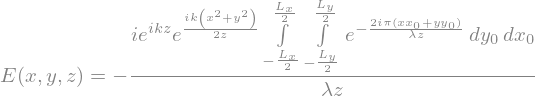

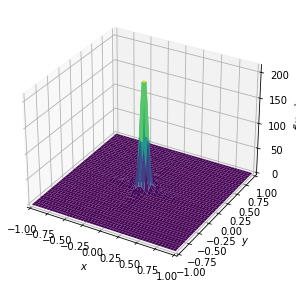

In [13]:
#----> Plotting 3D Diffraction Intensity
if "Fraunhofer_Diff_Int" in sets.flow:
    commands = ["xreplace", "oopti.Fraunhofer_Diff_Int", xreplaces]
    oopti.process(commands)
    res = (oopti.result.doit())
    res = simplify(res.rewrite(sin))
    intensity = simplify(res.rhs*conjugate(res.rhs))
    intensity = intensity.subs({z:0.2, l:1, Lx:1, Ly:1})
    plot3d(Int.rhs, (x,-1,1), (y,-1,1))